# Program do zaliczenia modułu 8.3

#### import niezbednych bibliotek

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

## Zadanie nr1 

#### Wczytanie danych do obiektu DF

In [6]:
police_data = pd.read_csv('fatal-police-shootings-data.csv')

In [7]:
type(police_data)

pandas.core.frame.DataFrame

## Zadanie nr2 

#### Przekształcenie tabeli tak by wskazywała zestawienie jednocześnie liczby ofiar interwencji według rasy raz tego, czy wykazywały one oznaki choroby psychicznej 

In [10]:
race_and_illness = police_data[['race','signs_of_mental_illness']].pivot_table(index= 'race',columns='signs_of_mental_illness',aggfunc=len )
race_and_illness

signs_of_mental_illness,False,True
race,,
A,69,24
B,1114,184
H,745,157
N,64,14
O,37,11
W,1763,713


## Zadanie nr3

#### za pomoca Apply dodaje do tego zestawienia kolumnę wskazującą jaki odsetek ofiar interwencji wykazywało oznaki choroby psychicznej dla każdej z ras

In [13]:
race_and_illness['percentage_of_mental_illness']=race_and_illness.apply(lambda x: ((x)[True]/np.sum(x)*100), axis=1)
race_and_illness

signs_of_mental_illness,False,True,percentage_of_mental_illness
race,,,
A,69,24,25.806452
B,1114,184,14.175655
H,745,157,17.405765
N,64,14,17.948718
O,37,11,22.916667
W,1763,713,28.796446


#### Sprawdzam która z nich charakteryzuje się największym odsetkiem znamion choroby psychicznej podczas interwencji.

In [15]:
biggest_procentage = np.max(race_and_illness[['percentage_of_mental_illness']])
race_and_illness[race_and_illness['percentage_of_mental_illness']==biggest_procentage]

signs_of_mental_illness,False,True,percentage_of_mental_illness
race,,,
W,1763,713,28.796446


## Zadanie nr4

#### Dodaje kolumnę oznaczającą dzień tygodnia, w którym doszło do interwencji.

In [18]:
police_data['week_day']=pd.to_datetime(police_data['date']).dt.day_name()
police_data

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,week_day
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Friday
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Saturday
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Sunday
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False,Saturday
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False,Saturday
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False,Monday
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False,Tuesday


#### Zliczam interwencje według odpowiedniego dnia tygodnia.

In [20]:
week_day_inter = pd.to_datetime(police_data['date']).dt.weekday 
week_day_inter = week_day_inter.value_counts()
week_day_inter.sort_index(inplace=True)
week_day_inter.index = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
week_day_inter

Monday       726
Tuesday      816
Wednesday    829
Thursday     810
Friday       761
Saturday     721
Sunday       753
Name: count, dtype: int64

#### Tworze wykres kolumnowy, tak aby dni tygodnia były uszeregowane od poniedziałku do niedzieli.

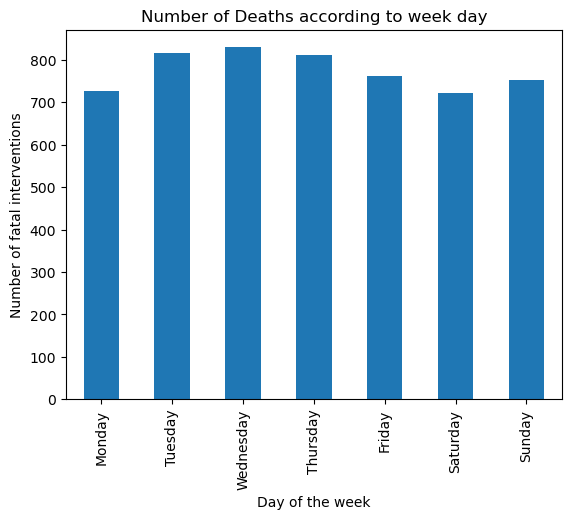

In [22]:
week_day_inter.plot.bar()
week_day_inter.plot.bar().set_ylabel('Number of fatal interventions')
week_day_inter.plot.bar().set_xlabel('Day of the week')
plt.title('Number of Deaths according to week day')
plt.show()

## Zadanie nr5 

#### Wczytuje dane z tabel w podanych linkach i zmieniam nazwy kolumn do późniejszej analizy, ekstrahuje tylko niezbedne dane

In [25]:
data_abbrev = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations', header=0)

In [26]:
states_abbrev = data_abbrev[1]
states_abbrev = states_abbrev[['ANSI','Name']].rename(columns={'ANSI':'state', 'Name':'State name'})

In [27]:
data_population = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population', header=0)

In [28]:
states_population = data_population[0]
states_population = states_population[['State','Census population, April 1, 2020 [1][2]']].rename(columns={'State':'State name', 'Census population, April 1, 2020 [1][2]':'State Population'})

In [29]:
left = police_data[['id','state']]


#### Łącze niezbedne dane z police_data z danymi z states_abbrev, by miec dostep do nazw stanów

In [31]:
police_and_abbrev= pd.merge(police_data[['state']],states_abbrev,how='inner',on='state')
police_and_abbrev

,state,State name
0,WA,Washington
1,OR,Oregon
2,KS,Kansas
3,CA,California
4,CO,Colorado
...,...,...
5411,MO,Missouri
5412,CA,California
5413,KS,Kansas
5414,IL,Illinois


#### Łącze niezbedne dane z police_and_abbrev z danymi z states_population, by miec dostep do populacji poszczególnych stanów

In [33]:
police_abbrev_population = pd.merge(police_and_abbrev,states_population,how='inner',on='State name')
police_abbrev_population

,state,State name,State Population
0,WA,Washington,7705281
1,OR,Oregon,4237256
2,KS,Kansas,2937880
3,CA,California,38538223
4,CO,Colorado,5773714
...,...,...,...
5411,MO,Missouri,6154913
5412,CA,California,38538223
5413,KS,Kansas,2937880
5414,IL,Illinois,12812508


#### Ze storzonej poprzednio bazy danych police_abbrev_population przygotowuję 2 tabele przestawne które poźniej połączę. 

In [35]:
right = police_abbrev_population.pivot_table(index='State name',values=['State Population'])

In [36]:
right.sample(10)

,State Population
State name,
North Dakota,779094.0
North Carolina,10439388.0
Rhode Island,1097379.0
Nevada,3104614.0
Colorado,5773714.0
Florida,21538187.0
Mississippi,2961279.0
Alaska,733391.0
Montana,1084225.0


In [37]:
left = police_abbrev_population.pivot_table(index='State name',values=['state'],aggfunc=len)

In [38]:
left= left.rename(columns={'state':'Number of fatal interventions'})

In [39]:
left.sample(10)

,Number of fatal interventions
State name,
Missouri,141
Arkansas,83
Vermont,9
Indiana,95
Colorado,195
North Carolina,156
Texas,481
Pennsylvania,108
Washington,152


#### łącze obie tabele przestawne w wyniku czego otrzymuje tabele z indeksami w postaci nazw Stanów i kolumny z liczbą zgonów oraz populację w danym stanie

In [41]:
final_result = pd.concat([left,right],axis = 1)
final_result.sample(10)

,Number of fatal interventions,State Population
State name,,
Mississippi,65,2961279.0
North Carolina,156,10439388.0
Idaho,42,1839106.0
Indiana,95,6785528.0
Iowa,32,3190369.0
Minnesota,61,5706494.0
Oklahoma,164,3959353.0
New Mexico,106,2117522.0
Kentucky,95,4505836.0


#### Tworze funkcje która obliczy współczynnik śmierci w wyniku interwencji na 1000 mieszkańców każdego stanu i wykonuje ją na tabeli za pomocą Apply

In [43]:
def rate(row):
    crime_rate_for_1000 = (row['Number of fatal interventions'] * 1000)/ row['State Population']
    return crime_rate_for_1000

In [44]:
final_result['Fatal interventions for 1000 inhabitants'] = final_result.apply(lambda row: rate(row),axis=1)
final_result

,Number of fatal interventions,State Population,Fatal interventions for 1000 inhabitants
State name,,,
Alabama,104,5024279.0,0.020699
Alaska,39,733391.0,0.053178
Arizona,254,7151502.0,0.035517
Arkansas,83,3011524.0,0.027561
California,799,38538223.0,0.020733
Colorado,195,5773714.0,0.033774
Connecticut,21,3605944.0,0.005824
Delaware,13,989948.0,0.013132
District of Columbia,13,689545.0,0.018853


# voilà!